# Notebook Overview

O notebook visa fazer um estudo de preços médios de veículos, através do uso de Inteligência Artificial.

Será explicado o passo a passo de como fazer a implementação do código, mostrando conceitos como EDA, visualização de dados, construção do modelo e por fim será exemplificado como transformar tais funcionalidades em uma API Rest.

Author: Mel Rocha

### Preparando o ambiente

In [1007]:
!pip install scikit-learn==1.3.2  # Machine Learning e funções de pré-processamento de dados.

In [1008]:
## Importe bibliotecas relevantes para processamento e visualização de dados

import numpy as np                # álgebra linear
import pandas as pd               # processamento de dados, I/O de arquivo de conjunto de dados (por exemplo, pd.read_csv)
import matplotlib.pyplot as plt   # visualização de dados e plotagem gráfica
import seaborn as sns             # para visualizar distribuições aleatórias
%matplotlib inline

##  Adicione bibliotecas adicionais para preparar e executar o modelo

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor

pd.options.display.float_format = '{:.4f}'.format

import warnings                    # para lidar com mensagens de aviso
warnings.filterwarnings('ignore')

## Contextualizando o experimento de estudo

O conjunto de dados foi extraído por meio da implementação de um crawler que obtem informações relevantes acerca de veículos.


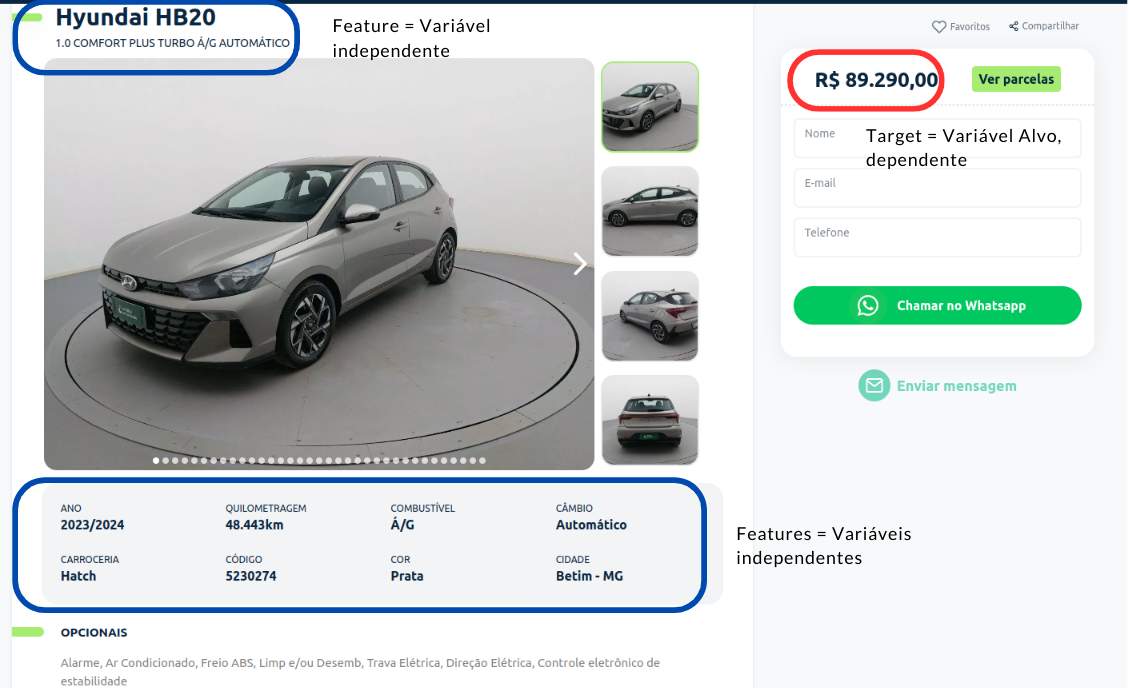

**Target (Variável Alvo):** É a variável que você deseja prever ou explicar. Também pode ser chamada de variável dependente, pois depende das outras variáveis para sua previsão ou explicação.

**Features:** São as variáveis usadas para prever ou explicar a variável alvo. Também são chamadas de variáveis independentes, pois não dependem diretamente do resultado da variável alvo.


No contexto da nossa aplicação desejamos prever o valor do preço de um determinado veículo, em um período futuro, para tanto levaremos em consideração as características relevantes do automóvel, tais quais marca, modelo ano modelo, etc.



## Carregando os dados, processando e preparando-os para EDA

In [1009]:
## Tenha baixado préviamente o conjunto de dados e feito o upload para o google colab
df = pd.read_csv('machinetable.csv')
df.head()

,id,created_at,updated_at,is_active,price,brand,url,crawl_date,year_reference,month_reference,...,model,year_fabrication,year_model,title,mileage,gear,fuel,bodywork,city,state
0,69c52d79-667f-4d7b-800e-e20f06ebc3c2,2025-01-18 23:14:24.230645-03:00,2025-01-18 23:14:24.230651-03:00,True,7699000.0000,HONDA,https://www.usadosbr.com//carros-e-utilitarios...,2025-01-18 23:14:24.230660-03:00,2025,1,...,CITY,NaN,2017,HONDA CITY,80000.0000,CVT,FLEX,SEDAN,CUIABA,MT
1,f0f2b352-757c-40e6-bcaf-de1192383d9c,2025-01-18 23:14:27.002594-03:00,2025-01-18 23:14:27.002601-03:00,True,6999000.0000,CHEVROLET,https://www.usadosbr.com//carros-e-utilitarios...,2025-01-18 23:14:27.002613-03:00,2025,1,...,ONIX,NaN,2023,CHEVROLET ONIX,69902.0000,MANUAL,FLEX,HATCH,GOIANIA,GO
2,8e97ce37-b3e6-4db1-8a65-d603ae1ac62c,2025-01-18 23:16:30.360775-03:00,2025-01-18 23:16:30.360782-03:00,True,6999000.0000,HYUNDAI,https://www.usadosbr.com//carros-e-utilitarios...,2025-01-18 23:16:30.360794-03:00,2025,1,...,HB20,NaN,2022,HYUNDAI HB20,44744.0000,MANUAL,FLEX,HATCH,SAO PAULO,SP
3,a4c59228-626e-406f-9036-d34360f8ffd5,2025-01-18 23:14:22.416528-03:00,2025-01-18 23:14:22.416546-03:00,True,5250000.0000,FORD,https://www.usadosbr.com//carros-e-utilitarios...,2025-01-18 23:14:22.416561-03:00,2025,1,...,ECOSPORT,NaN,2013,FORD ECOSPORT,228000.0000,MANUAL,FLEX,SUV,IBIUNA,SP
4,185d7281-7322-4d28-a11e-b962d692d532,2025-01-18 23:14:22.416587-03:00,2025-01-18 23:14:22.416593-03:00,True,17990000.0000,CHEVROLET,https://www.usadosbr.com//carros-e-utilitarios...,2025-01-18 23:14:22.416602-03:00,2025,1,...,S10,NaN,2017,CHEVROLET S10,141000.0000,AUTOMATICO,DIESEL,PICAPE CABINE DUPLA,GOIANIA,GO


In [1010]:
## Verifique a presença de quaisquer valores nulos

print(f'\033[94mNúmero de registros totais (linhas) no conjunto de dados: {df.shape[0]}')
print(f'\033[94mNúmero de atributos (colunas) no conjunto de dados: {df.shape[1]}')
print(f'\033[94mNúmero de entradas duplicadas no conjunto de dados: {df.duplicated().sum()}')
print(f'\033[94mNúmero de valores ausentes no conjunto de dados: {sum(df.isna().sum())}')


Número de registros totais (linhas) no conjunto de dados: 4846
Número de atributos (colunas) no conjunto de dados: 22
Número de entradas duplicadas no conjunto de dados: 0
Número de valores ausentes no conjunto de dados: 9697


A saída mostra que não há entradas duplicadas no conjunto de dados, entretanto possuímos uma série de valores ausentes.
Vamos verificar em quais colunas eles estão.

In [1011]:
# Contar valores ausentes por coluna
missing_values = df.isna().sum()

# Mostrar valores ausentes para cada coluna
print(missing_values)


id                     0
created_at             0
updated_at             0
is_active              0
price                  0
brand                  0
url                    0
crawl_date             0
year_reference         0
month_reference        0
description         4846
code_model             0
model                  0
year_fabrication    4846
year_model             0
title                  0
mileage                5
gear                   0
fuel                   0
bodywork               0
city                   0
state                  0
dtype: int64


Notamos que muitos registros não possuem descrição, e ano de fabricação, e uma pequena parcela não possui o dado da quilometragem. Conforme a análise do projeto iremos perceber que as duas colunas que não tem valor (ano de fabricação e descrição), não serão relevantes, e mais a frente iremos limpar o dataframe, ignorando as colunas irrelevantes. Por hora, iremos descartar os registros que não possuem a informação de quilometragem.

In [1012]:
# Descartar registros onde a coluna 'mileage' está ausente
df = df.dropna(subset=['mileage'])

# Confirmar a remoção
print(f"Número Total de Registros após descartar ausentes em 'mileage': {df.shape[0]}")

Número Total de Registros após descartar ausentes em 'mileage': 4841


In [1013]:
##  Avalie o DataFrame para verificar tipos de dados, contagem de valores, uso de memória, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, 0 to 4845
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4841 non-null   object 
 1   created_at        4841 non-null   object 
 2   updated_at        4841 non-null   object 
 3   is_active         4841 non-null   bool   
 4   price             4841 non-null   float64
 5   brand             4841 non-null   object 
 6   url               4841 non-null   object 
 7   crawl_date        4841 non-null   object 
 8   year_reference    4841 non-null   int64  
 9   month_reference   4841 non-null   int64  
 10  description       0 non-null      float64
 11  code_model        4841 non-null   object 
 12  model             4841 non-null   object 
 13  year_fabrication  0 non-null      float64
 14  year_model        4841 non-null   int64  
 15  title             4841 non-null   object 
 16  mileage           4841 non-null   float64
 17  

# Conhecendo o DataFrame, e suas features

In [1014]:
## Veja mais profundamente os dados, avaliando dados descritivos para cada feature
df.describe()

,price,year_reference,month_reference,description,year_fabrication,year_model,mileage
count,4841.0000,4841.0000,4841.0000,0.0000,0.0000,4841.0000,4841.0000
mean,10699729.3782,2025.0000,1.0000,NaN,NaN,2022.0409,47920.1161
std,6753808.5676,0.0000,0.0000,NaN,NaN,2.4168,25419.0706
min,1050000.0000,2025.0000,1.0000,NaN,NaN,1973.0000,0.0000
25%,7399000.0000,2025.0000,1.0000,NaN,NaN,2022.0000,40382.0000
50%,9449000.0000,2025.0000,1.0000,NaN,NaN,2023.0000,46278.0000
75%,12189000.0000,2025.0000,1.0000,NaN,NaN,2023.0000,51443.0000
max,175000000.0000,2025.0000,1.0000,NaN,NaN,2025.0000,315913.0000


In [1015]:
## dê uma olhada nos nomes das features, exclusivamente
df.columns

Index(['id', 'created_at', 'updated_at', 'is_active', 'price', 'brand', 'url',
       'crawl_date', 'year_reference', 'month_reference', 'description',
       'code_model', 'model', 'year_fabrication', 'year_model', 'title',
       'mileage', 'gear', 'fuel', 'bodywork', 'city', 'state'],
      dtype='object')

In [1016]:
## descartando as features irrelevantes (colunas)
df.drop(["id", "created_at", "updated_at", "is_active", "crawl_date", "url",
         "year_reference", "month_reference", "code_model", "year_fabrication",
         "description", "title"], axis=1, inplace=True)

## verificando as features após descartar recursos indesejados
df.columns

Index(['price', 'brand', 'model', 'year_model', 'mileage', 'gear', 'fuel',
       'bodywork', 'city', 'state'],
      dtype='object')

Descartamos as features que não seriam relevantes para determinar o valor do preço do automóvel.

### Novas Features


Essas novas variáveis foram adicionadas para dar ao modelo mais informações sobre o mercado de carros, ajudando ele a entender melhor o comportamento dos preços. Por exemplo, a idade do carro pode influenciar bastante no preço, assim como a marca, já que carros de marcas de luxo costumam ser mais caros. Além disso, fatores regionais, como o preço médio por estado ou cidade, também afetam o preço dos veículos. Ao incluir essas informações, o modelo consegue captar essas influências e, assim, ter uma previsão mais precisa dos preços.

In [1017]:
import datetime

# Idade do carro
current_year = datetime.datetime.now().year
df['age_years'] = current_year - df['year_model']

# diferença entre o preço de um veículo e o preço médio dos veículos com o mesmo modelo e ano modelo
df['price_deviation'] = df['price'] - df.groupby(['model', 'year_model'])['price'].transform('mean')

# Preço médio por marca
brand_avg = df.groupby('brand')['price'].transform('mean')
df['brand_avg_price'] = brand_avg

# Preço médio por estado
state_avg = df.groupby('state')['price'].transform('mean')
df['state_avg_price'] = state_avg

# Preço médio por cidade
city_avg = df.groupby('city')['price'].transform('mean')
df['city_avg_price'] = city_avg

# Marcas de luxo (ajuste conforme necessário)
luxury_brands = ['PORSCHE', 'JAGUAR', 'MERCEDES-BENZ', 'BMW', 'LAND ROVER', 'VOLVO']
df['is_luxury_brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

## Análise Exploratória de Dados: EDA

#### Análise Univariada: Verificando a Distribuição com Histogramas


Análise Univariada foi para verificar a distribuição dos dados de cada variável numérica. O objetivo é identificar padrões, como valores extremos (outliers), tendências, ou se os dados são balanceados.

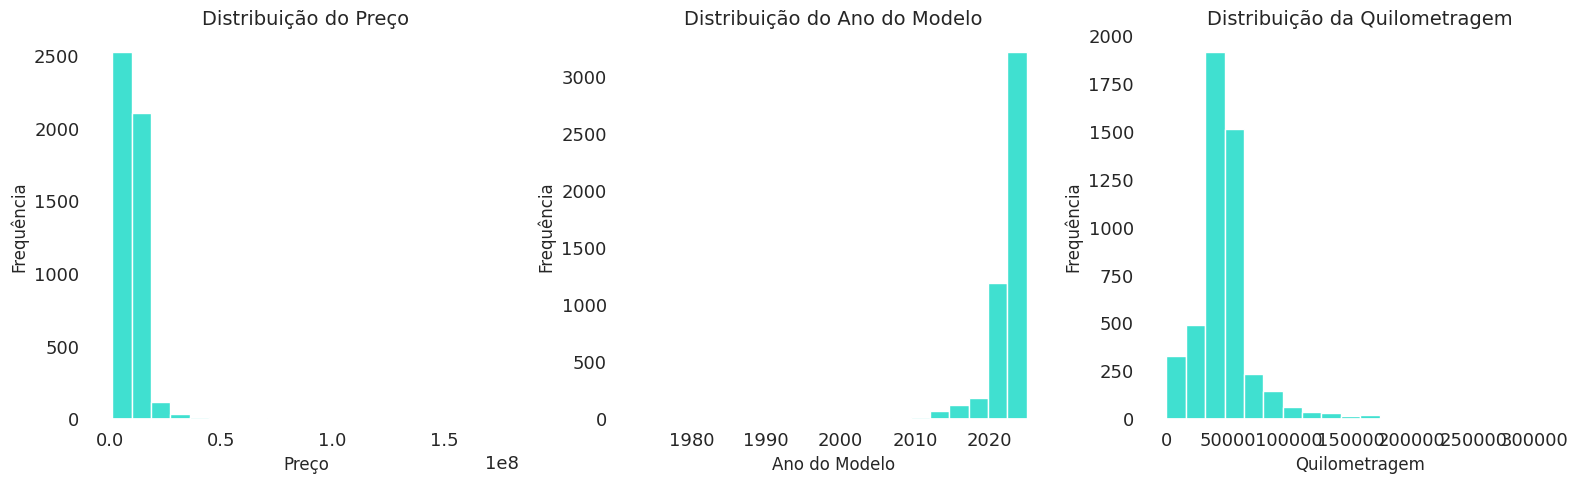

In [1018]:
# Configuração estética
sns.set(rc={'axes.facecolor': 'none', 'axes.grid': False, 'xtick.labelsize': 13, 'ytick.labelsize': 13})

# Criar um grid de histogramas
fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Grid de 1 linha e 3 colunas

# Distribuição do preço
df['price'].hist(ax=axes[0], color="#40E0D0", grid=False, bins=20)
axes[0].set_title('Distribuição do Preço', fontsize=14)
axes[0].set_xlabel('Preço', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)

# Distribuição do ano do modelo
df['year_model'].hist(ax=axes[1], color="#40E0D0", grid=False, bins=20)
axes[1].set_title('Distribuição do Ano do Modelo', fontsize=14)
axes[1].set_xlabel('Ano do Modelo', fontsize=12)
axes[1].set_ylabel('Frequência', fontsize=12)

# Distribuição da quilometragem
df['mileage'].hist(ax=axes[2], color="#40E0D0", grid=False, bins=20)
axes[2].set_title('Distribuição da Quilometragem', fontsize=14)
axes[2].set_xlabel('Quilometragem', fontsize=12)
axes[2].set_ylabel('Frequência', fontsize=12)

# Ajustar espaçamento
plt.tight_layout()
plt.show()


In [1019]:
# Importar bibliotecas
import pandas as pd

# Resumo Estatístico das Features Numéricas
numerical_features = ['price', 'year_model', 'mileage']
for feature in numerical_features:
    print(f"\nResumo da Feature: {feature}")
    print("-" * 30)
    print(df[feature].describe())
    print("\nDistribuição de Frequências:")
    print(df[feature].value_counts(bins=10, sort=False))  # Bins para categorizar a distribuição



Resumo da Feature: price
------------------------------
count        4841.0000
mean     10699729.3782
std       6753808.5676
min       1050000.0000
25%       7399000.0000
50%       9449000.0000
75%      12189000.0000
max     175000000.0000
Name: price, dtype: float64

Distribuição de Frequências:
(876049.999, 18445000.0]      4638
(18445000.0, 35840000.0]       156
(35840000.0, 53235000.0]        25
(53235000.0, 70630000.0]        12
(70630000.0, 88025000.0]         6
(88025000.0, 105420000.0]        1
(105420000.0, 122815000.0]       1
(122815000.0, 140210000.0]       0
(140210000.0, 157605000.0]       0
(157605000.0, 175000000.0]       2
Name: count, dtype: int64

Resumo da Feature: year_model
------------------------------
count   4841.0000
mean    2022.0409
std        2.4168
min     1973.0000
25%     2022.0000
50%     2023.0000
75%     2023.0000
max     2025.0000
Name: year_model, dtype: float64

Distribuição de Frequências:
(1972.9470000000001, 1978.2]       1
(1978.2, 1983.4]   

**Preços:** O dataset inclui uma grande variação nos preços, com uma predominância de veículos em faixas de preço intermediárias, mas com registros de veículos extremamente caros.

**Ano modelo:** A maior parte dos veículos são novos (2022 e 2023), com poucos veículos mais antigos.

**Quilometragem:** A maioria dos veículos tem uma quilometragem relativamente baixa, o que pode refletir a presença predominante de veículos novos, embora também haja alguns veículos com quilometragem mais alta.

#### Análise Bivariada

 análise bivariada tem como objetivo explorar a relação entre duas variáveis em um conjunto de dados. Ela permite identificar padrões, correlações ou dependências entre essas variáveis e como uma pode influenciar ou se relacionar com a outra.


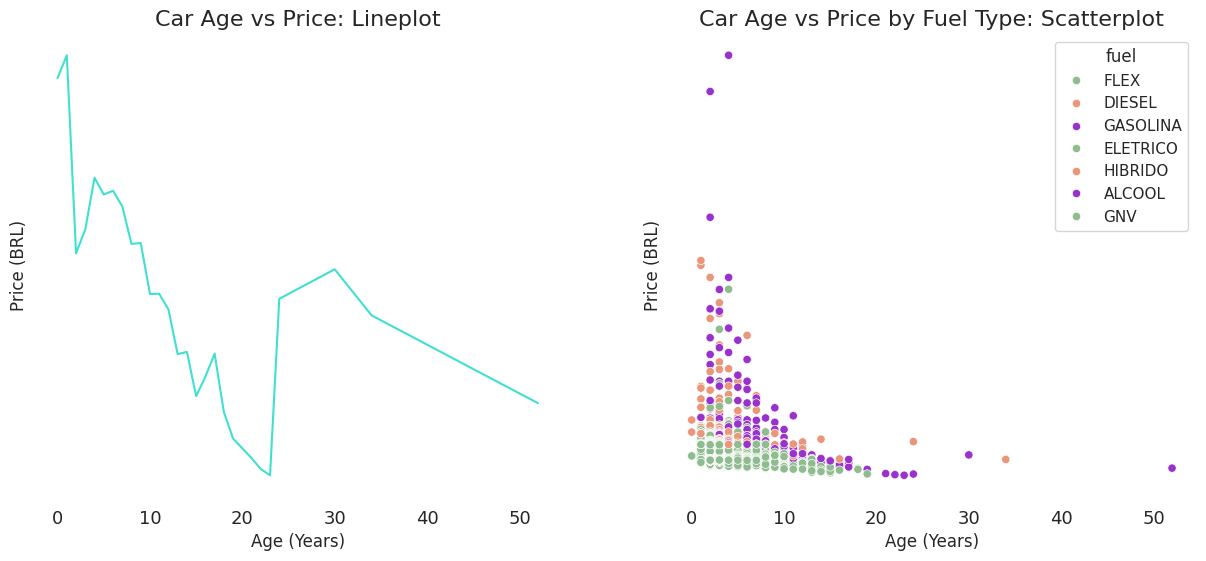

In [1020]:
# Preço méido do veículo
df_avg_price_by_age = df.groupby('age_years')['price'].mean().reset_index()


# Criando a visualização de dados
# Configuração de cores
my_pal = ('#8FBC8F', '#E9967A', '#9932CC')

# Tamanho da figura
plt.figure(figsize=(15,6))

# Gráfico 1: Relação entre Idade do Carro e Preço
plt.subplot(1,2,1)
plt.title('Car Age vs Price: Lineplot', fontsize=16)
sns.lineplot(data=df, x="age_years", y="price", color="#40E0D0", ci=None)
plt.xlabel('Age (Years)'), plt.ylabel('Price (BRL)'), plt.yticks([])

# Gráfico 2: Relação entre Idade do Carro, Preço e Tipo de Combustível
plt.subplot(1,2,2)
plt.title('Car Age vs Price by Fuel Type: Scatterplot', fontsize=16)
sns.scatterplot(x='age_years', y='price', hue='fuel', palette=my_pal, data=df)
plt.xlabel('Age (Years)'), plt.ylabel('Price (BRL)'), plt.yticks([])

# Mostrar os gráficos
plt.show()

In [1021]:
# Preço médio por idade e tipo de combustível
price_by_age_fuel = df.groupby(['age_years', 'fuel'])['price'].mean().reset_index()

# Exibir as primeiras linhas do resultado
print(price_by_age_fuel.head())


   age_years      fuel         price
0          0    DIESEL 21434840.0000
1          0      FLEX  9046100.0000
2          1    DIESEL 26995435.7143
3          1      FLEX 12776637.6812
4          1  GASOLINA 23859666.6667


In [1022]:
# Correlação entre idade e preço
correlation = df[['age_years', 'price']].corr()
print(correlation)


           age_years   price
age_years     1.0000 -0.0515
price        -0.0515  1.0000


Distribuição de Preço por Idade 1:

Os preços dos carros com idade 1 variam bastante dependendo do tipo de combustível. De acordo com os dados apresentados:

O preço médio de carros com combustível DIESEL (por exemplo, o carro com preço de 26.995.435,71) é mais elevado, o que pode ser relacionado a uma percepção de maior durabilidade e melhor desempenho do motor.
Carros com combustível FLEX e GASOLINA têm preços mais baixos, o que é esperado, pois os carros com esses tipos de combustível são, em geral, mais acessíveis.
Preço Médio de Carros com Idade 1:

Para carros DIESEL, o preço médio é bem mais alto do que para FLEX e GASOLINA. Isso pode ser explicado pelo fato de que motores a diesel tendem a ser mais caros, especialmente em veículos pesados ou de luxo, que geralmente duram mais e têm maior torque, resultando em maior valor.
FLEX e GASOLINA apresentam uma variação de preços mais baixa, o que é esperado, pois geralmente são mais comuns em carros populares ou de massa.

#### Análise Por Região Geográfica

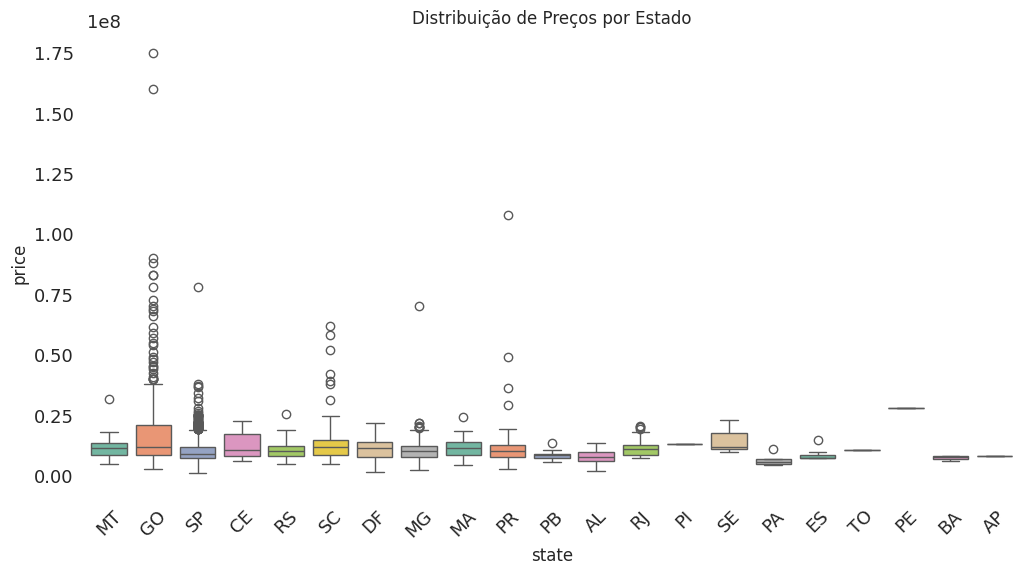

In [1023]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="state", y="price", data=df, palette="Set2")
plt.title('Distribuição de Preços por Estado')
plt.xticks(rotation=45)
plt.show()

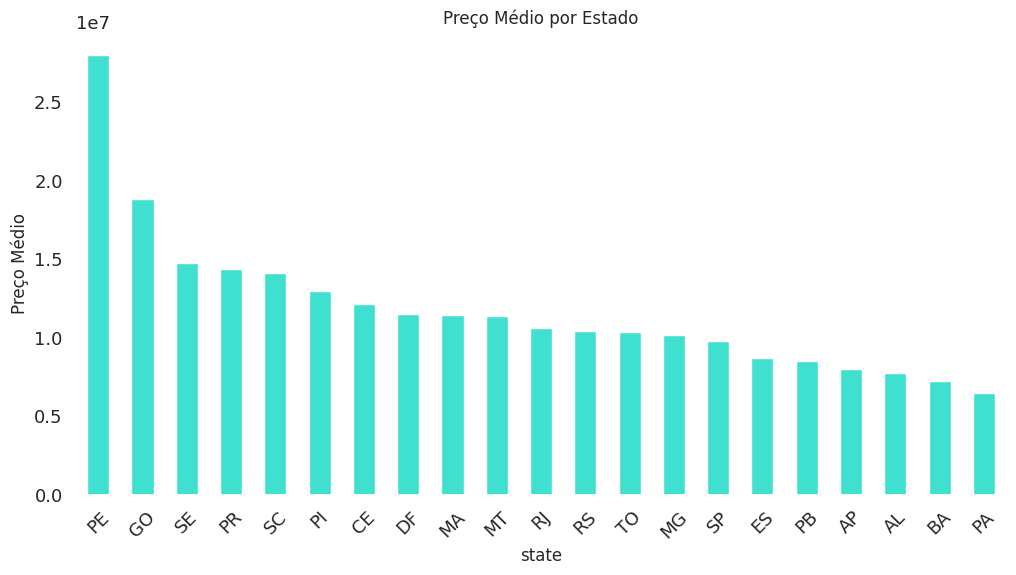

In [1024]:
avg_price_by_state = df.groupby('state')['price'].mean().sort_values(ascending=False)

# Visualizando com um gráfico de barras
plt.figure(figsize=(12, 6))
avg_price_by_state.plot(kind='bar', color='#40E0D0')
plt.title('Preço Médio por Estado')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

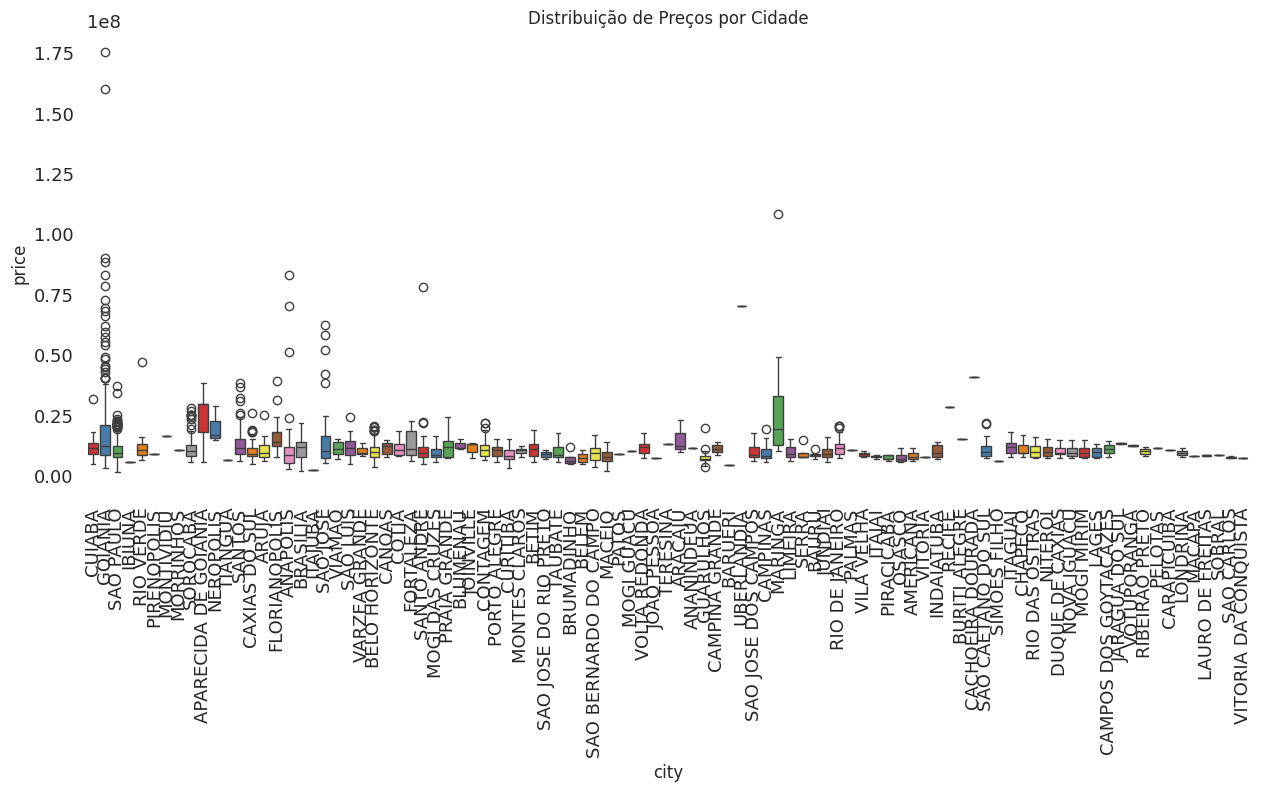

In [1025]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="city", y="price", data=df, palette="Set1")
plt.title('Distribuição de Preços por Cidade')
plt.xticks(rotation=90)
plt.show()

In [1026]:
# Estatísticas resumidas para preço por estado
state_stats = df.groupby('state')['price'].describe()

# Estatísticas resumidas para preço por cidade
city_stats = df.groupby('city')['price'].describe()

# Exibindo as estatísticas
print("Estatísticas de Preço por Estado:")
print(state_stats)

print("\nEstatísticas de Preço por Cidade:")
print(city_stats)

Estatísticas de Preço por Estado:
          count          mean           std           min           25%  \
state                                                                     
AL      54.0000  7725018.5185  3033289.3876  1600000.0000  5749750.0000   
AP       1.0000  7999000.0000           NaN  7999000.0000  7999000.0000   
BA       4.0000  7261750.0000  1005692.2574  5950000.0000  6736750.0000   
CE      30.0000 12111633.3333  5122883.4182  5890000.0000  8099250.0000   
DF      61.0000 11488232.7869  4603361.3609  1550000.0000  7399000.0000   
ES       7.0000  8709571.4286  2768946.2410  7275000.0000  7321000.0000   
GO     296.0000 18843937.7703 20105952.9211  2590000.0000  8196750.0000   
MA      33.0000 11419181.8182  3973285.2627  4390000.0000  8390000.0000   
MG     941.0000 10169664.9309  3495714.3712  2059900.0000  7469000.0000   
MT      51.0000 11402058.8235  4144622.8509  4599000.0000  8599000.0000   
PA       4.0000  6496750.0000  3035295.7434  4399000.0000  4849000

Alta Variabilidade em Preços: Em estados como Goiás e Minas Gerais, há uma grande variação nos preços. Isso pode indicar a presença de veículos em faixas muito diversas, incluindo carros de luxo e de colecionador.

Destaques Regionais: Cidades como São Paulo, Rio de Janeiro, e Goiânia têm preços significativamente mais altos devido ao alto custo de veículos.

Potenciais Outliers: Preços extremos, como os encontrados em Goiás e São Paulo, indicam que esses mercados podem ser dominados por veículos de valor muito alto, o que pode afetar a análise de preço médio em um estado ou cidade.
Distribuição dos Preços: A distribuição dos preços por estado e cidade é desigual, e algumas regiões, como Vitória (ES), mostram uma concentração de preços ao redor de um único valor.

#### Principais marcas por número de modelos

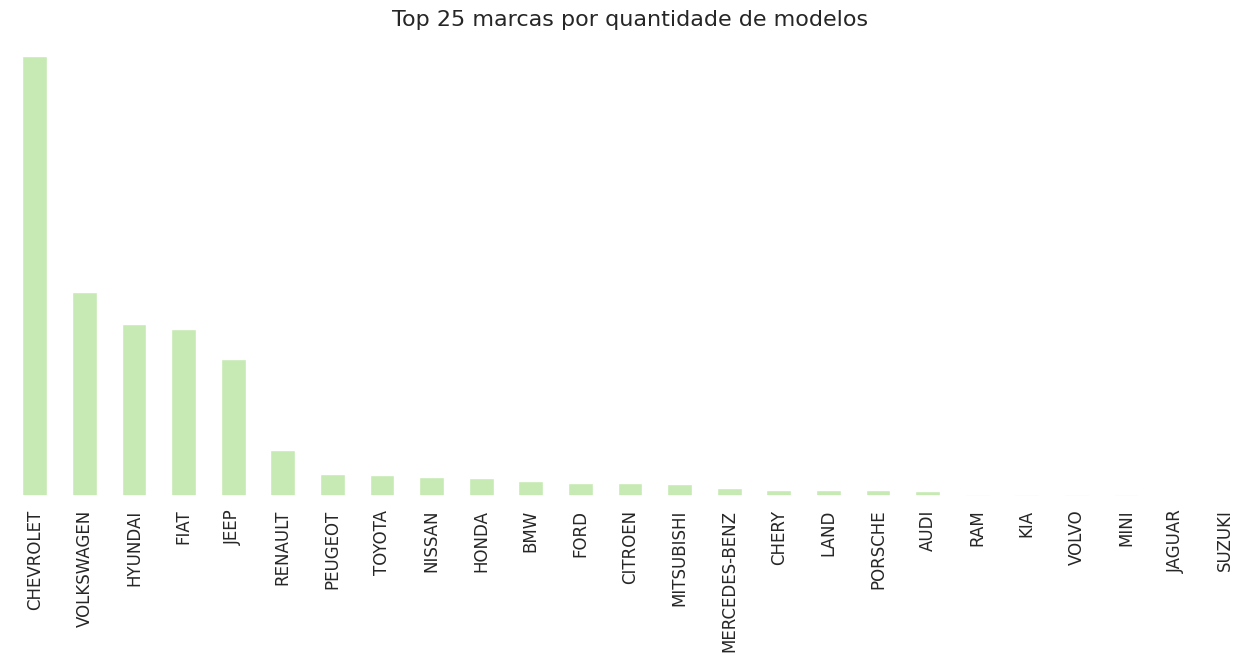

In [1027]:
## Principais marcas por número de modelos
top_brands_mdl = df[['brand', 'model']].groupby('brand').count().sort_values(by="model", ascending=False).head(25)

top_brands_mdl.plot(kind='bar', subplots=False, fontsize = 12, color= "#c7e9b4", legend=None, figsize=(16,6))

plt.title('Top 25 marcas por quantidade de modelos', fontsize = 16)
plt.xlabel(None), plt.yticks([])
plt.show()

#### Principais marcas por preço

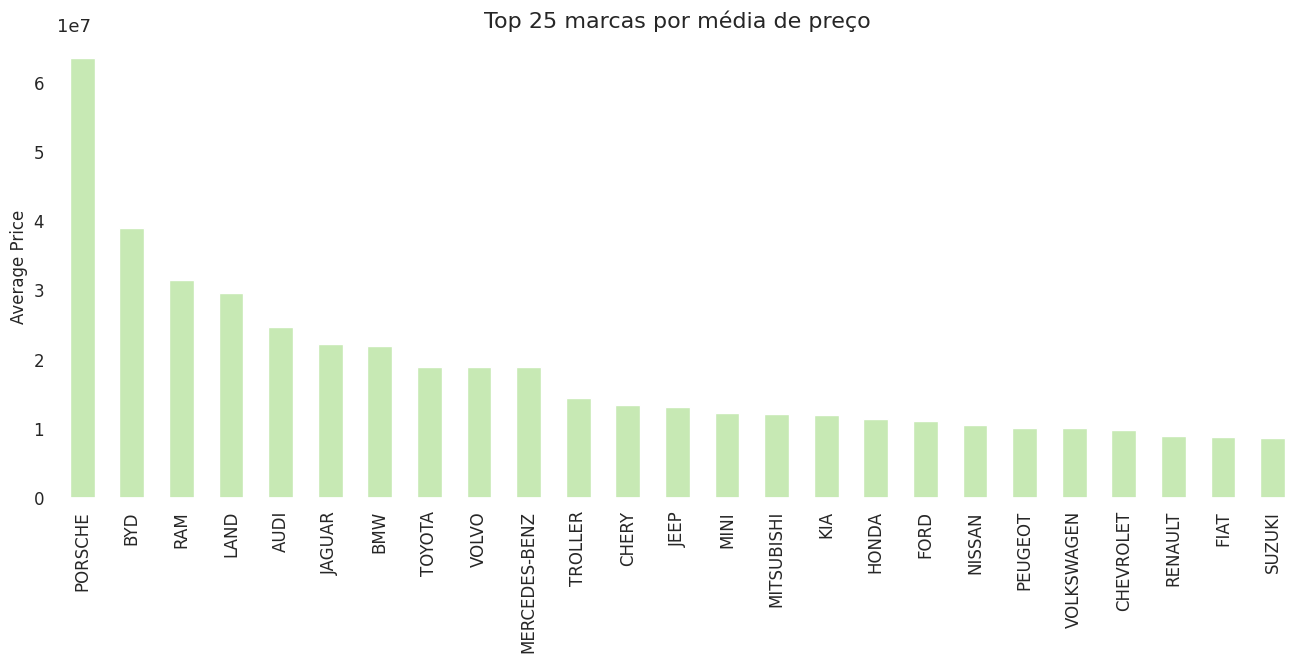

In [1028]:
## Principais marcas por preço médio

# Agrupando por 'brand' e calculando o preço médio
top_brands_avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(25)

# Plotando o gráfico
top_brands_avg_price.plot(kind='bar', fontsize=12, color="#c7e9b4", legend=None, figsize=(16,6))

plt.title('Top 25 marcas por média de preço', fontsize=16)
plt.xlabel(None)
plt.ylabel('Average Price', fontsize=12)
plt.show()


Notamos que o dataset é composto em sua parte marjoritária por veículos populares, (chevrolet, volkswagem, hyundai e fiat). Entretanto também possui algumas marcas de alto valor tal qual Porsche.

Tal fato pode explicar a tamanha variação de preços do dataset.

#### Análise Multivariada


Objetivo da Análise:
A ideia é investigar se há uma diferença significativa nos preços médios dos veículos com base nessas três características combinadas. Em termos mais simples, queremos saber se, por exemplo:

Veículos de determinada marca têm preços médios mais altos ou mais baixos.
Tipos de câmbio (gear) influenciam o preço médio de um veículo (por exemplo, câmbio automático tende a ter preços mais altos que câmbio manual?).
Tipos de carroceria (bodywork), como sedan ou SUV, impactam no preço médio dos veículos.


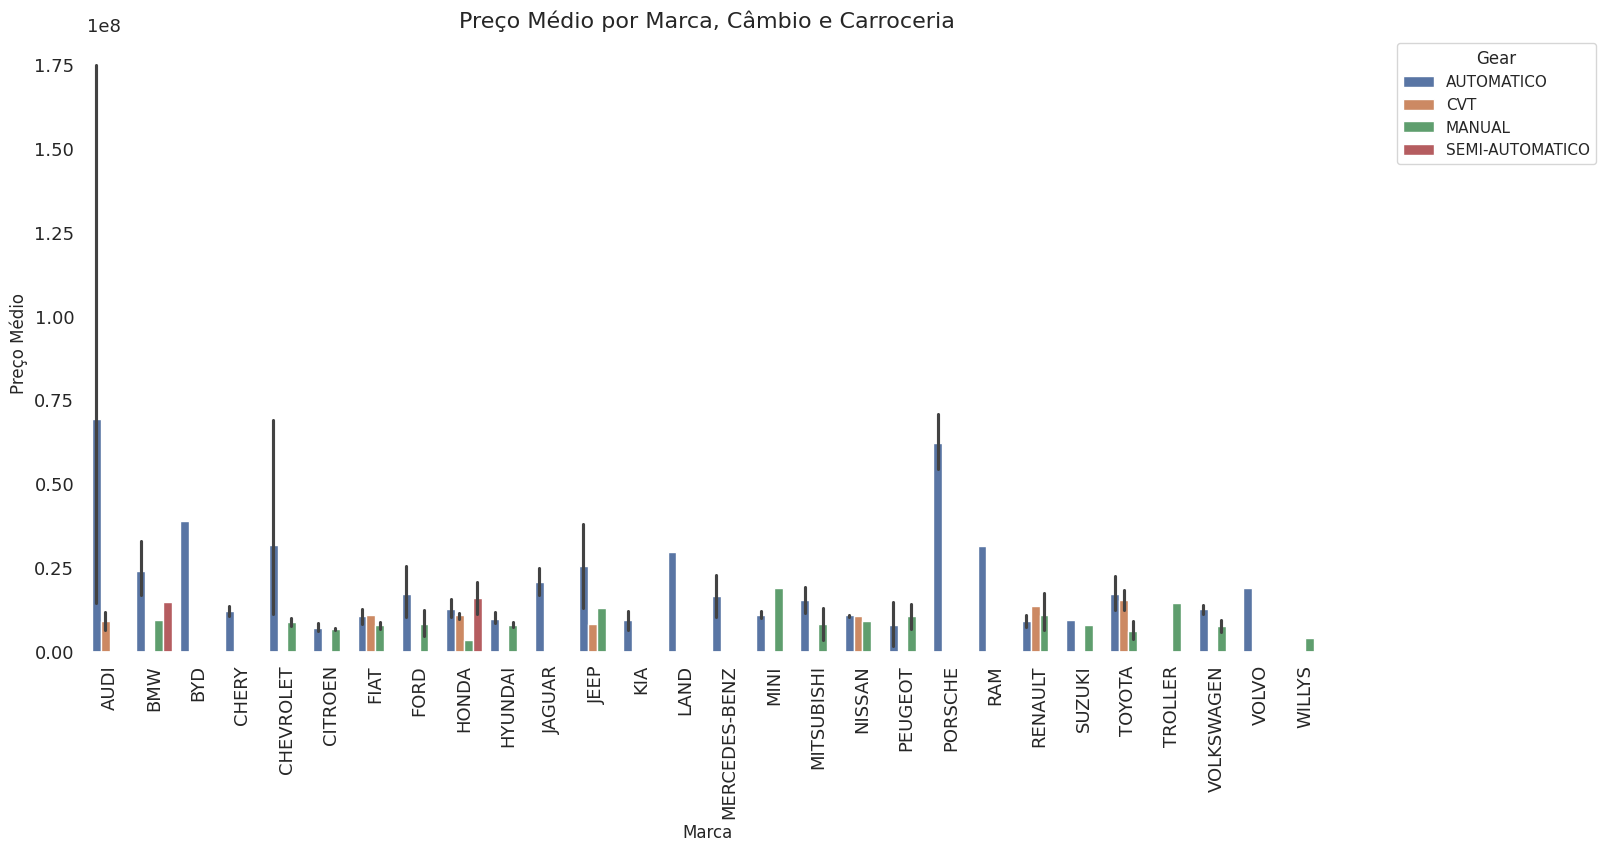

In [1029]:
# Agrupando por marca, gear e bodywork e calculando o preço médio
top_brands_gear_bodywork = df.groupby(['brand', 'gear', 'bodywork'])['price'].mean().reset_index()

# Plotando os preços médios para cada combinação de marca, gear e bodywork
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.barplot(data=top_brands_gear_bodywork, x='brand', y='price', hue='gear', dodge=True)

# Título e ajustes do gráfico
plt.title('Preço Médio por Marca, Câmbio e Carroceria', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Gear', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [1030]:
# Agrupando por marca, gear e bodywork e calculando o preço médio
top_brands_gear_bodywork = df.groupby(['brand', 'gear', 'bodywork'])['price'].mean().reset_index()

# Imprimindo as primeiras linhas para visualização no terminal
print("Tabela com Preço Médio por Marca, Gear e Carroceria:")
print(top_brands_gear_bodywork.head())  # Mostra as primeiras 5 linhas da tabela

# Para visualizar um resumo das estatísticas, como média e desvio padrão
print("\nEstatísticas Descritivas (Preço Médio por Marca, Gear e Carroceria):")
print(top_brands_gear_bodywork['price'].describe())

# Exibindo a tabela completa (se necessário, pode ser muito longa)
# Descomente a linha abaixo se desejar ver toda a tabela no terminal
# print(top_brands_gear_bodywork)


Tabela com Preço Médio por Marca, Gear e Carroceria:
  brand        gear bodywork          price
0  AUDI  AUTOMATICO    COUPE 175000000.0000
1  AUDI  AUTOMATICO    SEDAN  14470000.0000
2  AUDI  AUTOMATICO      SUV  18520536.3636
3  AUDI         CVT    SEDAN   6499700.0000
4  AUDI         CVT      SUV  11900000.0000

Estatísticas Descritivas (Preço Médio por Marca, Gear e Carroceria):
count         151.0000
mean     16105388.3510
std      21014032.1671
min       1550000.0000
25%       8217333.3333
50%      10999000.0000
75%      14787863.4615
max     175000000.0000
Name: price, dtype: float64


Grande variação nos preços: O desvio padrão elevado (21 milhões) e a diferença entre o preço mínimo (1,55 milhões) e o preço máximo (175 milhões) indicam uma grande variação nos preços médios entre as combinações de marcas, gear e carroceria. Isso pode ser esperado devido à diversidade de veículos esportivos, de luxo e colecionadores, que podem variar muito de acordo com o tipo de câmbio e carroceria.

Preço médio de 16 milhões: A média de 16 milhões é bastante alta, o que sugere que a maioria dos veículos analisados são de alto valor, provavelmente veículos de luxo ou esportivos.

Distribuição dos preços: A mediana de 10,99 milhões mostra que metade das combinações de preços são menores do que isso, enquanto a média está acima da mediana, o que significa que há algumas combinações de preço muito altas que estão puxando a média para cima.

É perceptível que a base de dados sofre com um grande número de outliers, tais valores podem acabar distorcendo o resultado final de previsão de preços, deve ser feito uma tratativa para sanar tal problema.

A abordagem escolhida foi filtrar os valores discrepantes de preço e descarta-los.

In [1031]:
# Cálculo do IQR para detectar outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrando os outliers
df_clean = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

# Verificando os resultados
print(f"Dados originais: {len(df)} registros")
print(f"Dados após remoção dos outliers: {len(df_clean)} registros")

# Exibindo as estatísticas descritivas do dataframe sem outliers
print(df_clean['price'].describe())

Dados originais: 4841 registros
Dados após remoção dos outliers: 4670 registros
count       4670.0000
mean     9834804.9550
std      2884612.4249
min      1050000.0000
25%      7399000.0000
50%      9229000.0000
75%     11999000.0000
max     19355000.0000
Name: price, dtype: float64


#### Mapa de calor de correlação

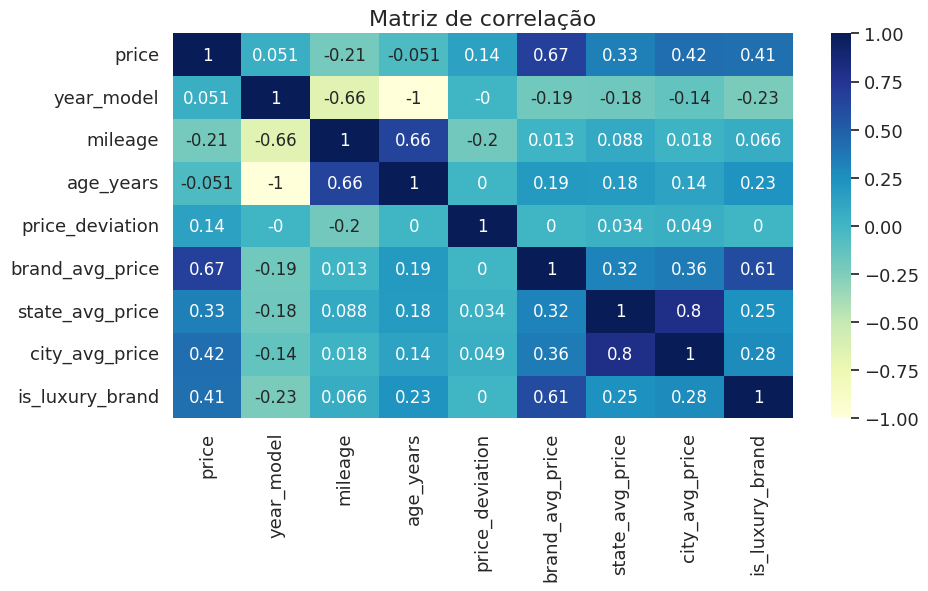

In [1032]:
plt.figure(figsize=(10,5))
# Seleciona apenas colunas numéricas para o cálculo da correlação
numeric_df = df.select_dtypes(include=['number'])  # Filtra o dataframe para incluir apenas colunas numéricas
corr = numeric_df.corr(method='pearson').round(4) # Calcula a correlação apenas nas colunas numéricas
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Matriz de correlação", fontsize=16)
plt.show()

## Estendendo os tipos de dados das features

1. Variáveis Numéricas (Quantitativas)
São variáveis que contêm valores numéricos e geralmente estão associadas a alguma métrica ou quantidade. Elas podem ser inteiras (int) ou decimais (float).

2. Variáveis Categóricas (Qualitativas)
São variáveis que contêm valores qualitativos ou categorias. Elas representam características como nomes, rótulos ou classificações, e geralmente são do tipo string (texto) ou object. Podem ser usadas para segmentar dados, como em gráficos de barras ou como variáveis de entrada em modelos de aprendizado de máquina.

Cada tipo de feature é destinado a algo conforme a explicação no bloco de texto acima. Seu tipo também determinará o método de processamento de dado escolhido para transformar o dado de entrada em algo usável para o modelo.

Transformação de Categóricas em Numéricas:

Quando você deseja usar variáveis categóricas em modelos de machine learning (como regressão ou árvores de decisão), essas variáveis precisam ser convertidas para valores numéricos. Isso pode ser feito de diferentes formas:

**Codificação de Rótulos (Label Encoding):** Atribui um número inteiro para cada categoria única.

**Codificação One-Hot:** Cria colunas binárias (0 ou 1) para representar cada categoria.

Variáveis Categóricas: Nominais x Ordinais
As variáveis categóricas podem ser divididas em nominais e ordinais:

**Nominais:** Não possuem uma ordem ou hierarquia. Exemplos são: brand, fuel (gasolina, diesel, etc.), bodywork (tipo de carroceria).

**Ordinais:** Possuem uma ordem ou ranking implícito. Exemplos: educação (ensino fundamental, médio, superior), avaliação de satisfação (ruim, médio, bom, excelente).

In [1033]:
# Separando as colunas numéricas e categóricas
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Exibindo as colunas numéricas
print("Colunas numéricas:")
print(numerical_columns)

# Exibindo as colunas categóricas
print("\nColunas categóricas:")
print(categorical_columns)


Colunas numéricas:
Index(['price', 'year_model', 'mileage', 'age_years', 'price_deviation',
       'brand_avg_price', 'state_avg_price', 'city_avg_price',
       'is_luxury_brand'],
      dtype='object')

Colunas categóricas:
Index(['brand', 'model', 'gear', 'fuel', 'bodywork', 'city', 'state'], dtype='object')


## Preparando os dados para modelagem - Aplicando transformações


**Transformação das variáveis categóricas com o OneHotEncoder:**

O OneHotEncoder é utilizado para transformar variáveis categóricas em variáveis numéricas, representando cada categoria como uma coluna binária (0 ou 1). Esse processo permite que os modelos de aprendizado de máquina usem essas variáveis de maneira eficaz.
Exemplo:

Para uma coluna "marca" que tenha valores como "BMW", "Mercedes" e "Audi", o OneHotEncoder cria colunas separadas para cada uma dessas marcas, com valores 0 ou 1 indicando a presença ou ausência de cada marca em uma linha específica.

In [1034]:
## codificação de labels
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False para saída de array, handle_unknown para evitar erros com valores não vistos durante a previsão

## selecione colunas categóricas
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    # Remodele os dados de entrada para uma matriz 2D
    encoded_data = ohe.fit_transform(df[[i]]) # Double brackets para selecionar coluna como DataFrame
    # Crie um DataFrame a partir dos dados codificados
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([i]), index=df.index)
    # Concatene o DataFrame codificado com o DataFrame original
    df = df.drop(i, axis=1)  # Remova as colunas categóricas originais
    df = pd.concat([df, encoded_df], axis=1)

main_df = df

**Por que não estamos transformando o target?**

Se você realizar a segregação de X e y **após** a transformação numérica, isso significaria que você estaria aplicando a transformação em todas as variáveis (incluindo a variável target, dependente, price), o que não é o ideal. Isso porque a variável dependente, price, normalmente deve manter seus valores originais (não transformados), já que é a variável alvo para a previsão.

In [1035]:
# Segregando a variável dependente no eixo Y e variáveis ​​independentes no eixo X
X = main_df.drop(columns=["price"])
y = main_df["price"]


**Transformação dos dados numéricos com o StandardScaler:**

O StandardScaler é usado para padronizar as variáveis numéricas, ou seja, ele ajusta os dados para que tenham média 0 e desvio padrão 1. Isso é útil porque muitas vezes os modelos de aprendizado de máquina funcionam melhor quando as variáveis estão na mesma escala.

In [1036]:
# escalonador padrão
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [1037]:
## dividir os dados
X_train, X_test, y_train, y_test = train_test_split(x_scaled ,y, test_size=0.2, random_state=0)

## criar função para ajustar modelos
model_preds = []

def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    adj_r2 = round(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, adj_r2, mse, mae, rmse])
    print("O valor de R-quadrado (r2) é: ", r2)
    print("O valor ajustado de R-quadrado (adj_r2) é: ", adj_r2)
    print("O erro quadrático médio (MSE) é: ", mse)
    print("O erro quadrático médio da raiz (RMSE) é: ", rmse)
    print("O erro absoluto médio (MAE) é: ", mae)

## Função de avaliação de modelo
def model_eval():
    preds = pd.DataFrame(model_preds)  # Cria um DataFrame com as previsões do modelo
    preds.columns = ["Nome_Modelo", "Valor_R2", "Valor_adj_R2", "MSE", "RMSE", "MAE"]  # Renomeia as colunas
    return preds.sort_values(by="Valor_R2", ascending=False)

## Modelagem

In [1038]:
## Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

fit_model(lr_model, "Linear Regression")

O valor de R-quadrado (r2) é:  -1.2574016186959497e+27
O valor ajustado de R-quadrado (adj_r2) é:  -1.3657593883501788e+27
O erro quadrático médio (MSE) é:  2.8752361774499425e+40
O erro quadrático médio da raiz (RMSE) é:  1.6956521392815043e+20
O erro absoluto médio (MAE) é:  2.1674319204983067e+19


In [1039]:
## XG Boost
XGB_model = xgb.XGBRFRegressor()
fit_model(XGB_model, "XG Boost")

O valor de R-quadrado (r2) é:  0.7101
O valor ajustado de R-quadrado (adj_r2) é:  0.6851
O erro quadrático médio (MSE) é:  6628748189591.096
O erro quadrático médio da raiz (RMSE) é:  2574635.545
O erro absoluto médio (MAE) é:  1291697.5764


In [1040]:
## Random Forest
randfor_model = RandomForestRegressor()
fit_model(randfor_model, "Random Forest Regressor")

O valor de R-quadrado (r2) é:  0.8276
O valor ajustado de R-quadrado (adj_r2) é:  0.8127
O erro quadrático médio (MSE) é:  3942104607563.0913
O erro quadrático médio da raiz (RMSE) é:  1985473.3963
O erro absoluto médio (MAE) é:  460448.9062


In [1041]:
## Decision Trees
dectree_model = DecisionTreeRegressor()
fit_model(dectree_model, "Decision Tree Regressor")

O valor de R-quadrado (r2) é:  0.7799
O valor ajustado de R-quadrado (adj_r2) é:  0.7609
O erro quadrático médio (MSE) é:  5032161042850.877
O erro quadrático médio da raiz (RMSE) é:  2243247.8782
O erro absoluto médio (MAE) é:  521839.5769


In [1042]:
## KNN
knn_model = KNeighborsRegressor(n_neighbors=6)
fit_model(knn_model, "K-Neigbors Regressor")

O valor de R-quadrado (r2) é:  0.5287
O valor ajustado de R-quadrado (adj_r2) é:  0.4881
O erro quadrático médio (MSE) é:  10778028124151.26
O erro quadrático médio da raiz (RMSE) é:  3282990.7286
O erro absoluto médio (MAE) é:  1060448.6154


In [1043]:
## GBR
gb_model = GradientBoostingRegressor(random_state=0)
fit_model(gb_model, "Gradient Boosting")

O valor de R-quadrado (r2) é:  0.8181
O valor ajustado de R-quadrado (adj_r2) é:  0.8024
O erro quadrático médio (MSE) é:  4158535533817.8726
O erro quadrático médio da raiz (RMSE) é:  2039248.767
O erro absoluto médio (MAE) é:  911429.8156


## Avaliação do modelo

In [1044]:
## Avaliação do modelo
model_eval()

,Nome_Modelo,Valor_R2,Valor_adj_R2,MSE,RMSE,MAE
2,Random Forest Regressor,0.8276,0.8127,3942104607563.0913,460448.9062,1985473.3963
5,Gradient Boosting,0.8181,0.8024,4158535533817.8726,911429.8156,2039248.7670
3,Decision Tree Regressor,0.7799,0.7609,5032161042850.8770,521839.5769,2243247.8782
1,XG Boost,0.7101,0.6851,6628748189591.0957,1291697.5764,2574635.5450
4,K-Neigbors Regressor,0.5287,0.4881,10778028124151.2598,1060448.6154,3282990.7286
0,Linear Regression,-1257401618695949700216913920.0000,-1365759388350178801697685504.0000,28752361774499424825478153985781548449792.0000,21674319204983066624.0000,169565213928150433792.0000
